# Plotting Currents in Python

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import netcdf

In [2]:
fpath = '/gscratch/jisao/mclaret/GL64/'
gridU_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridU_k1.nc','r')
gridV_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridV_k1.nc','r')

In [3]:
# verify data shapes
coords = ['nav_lat', 'nav_lon']
for coord in coords:
    if gridU_k1.variables[coord].shape == gridV_k1.variables[coord].shape:
        print(coord, 'shapes match.')
    else:
        print(coord, 'shapes do not match.')

if gridU_k1.variables['vozocrtx'].shape == gridV_k1.variables['vomecrty'].shape:
    print('component shapes match.')
else:
    print('component shapes do not match.')

nav_lat shapes match.
nav_lon shapes match.
component shapes match.


In [4]:
# keep U variables
U_lat = gridU_k1.variables['nav_lat'][:][:].copy()        # latitude
U_lon = gridU_k1.variables['nav_lon'][:][:].copy()        # longitude
U_t0 = gridU_k1.variables['vozocrtx'][0][0][:][:].copy()  # zonal velocity at time zero

# keep V variables
V_lat = gridV_k1.variables['nav_lat'][:][:].copy()        # latitude
V_lon = gridV_k1.variables['nav_lon'][:][:].copy()        # longitude
V_t0 = gridV_k1.variables['vomecrty'][0][0][:][:].copy()  # meridional velocity at time zero

gridU_k1.close()
gridV_k1.close()

In [7]:
# currents
vel = 0.5 * (U_t0**2 + V_t0**2)

# set break intervals
breaks = np.linspace(0.0,0.15,40)
bticks = np.linspace(0.0,0.15,10)

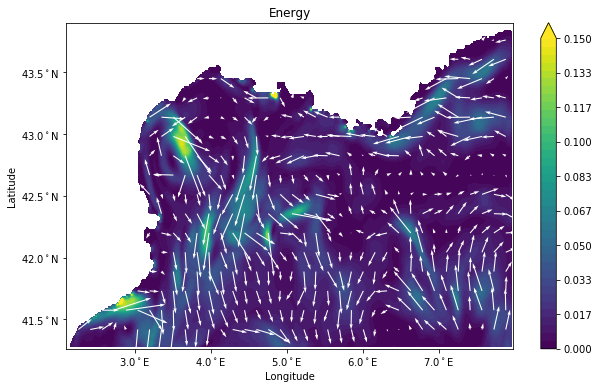

In [9]:
# set up plot
fig, ax = plt.subplots(figsize=(10,6))

# mask land with white (value = 0.0)
vel = np.ma.masked_where(vel == 0.0, vel)
cmap = plt.cm.OrRd
cmap.set_bad(color='w')
# Note: without this step, land gets masked by contour colors (values are near zero)

# plot contour map
vel_map = plt.contourf(U_lon, U_lat, vel, breaks, extend='max')

# draw every 10th vector
q = ax.quiver(U_lon[::10, ::10], U_lat[::10,::10], U_t0[::10,::10], V_t0[::10,::10], color='w')

# format lat/long labels
locs, labels = plt.xticks()
Elabels = [str(loc) + '$^\circ$E' for loc in locs]
plt.xticks(locs[1:-1], Elabels[1:-1])
locs, labels = plt.yticks()
Nlabels = [str(loc) + '$^\circ$N' for loc in locs]
plt.yticks(locs[1:-1], Nlabels[1:-1])

# figure labels
plt.colorbar(vel_map, format='%.3f', ticks=bticks)
plt.title('Energy')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()